<a href="https://colab.research.google.com/github/StevenWestmoreland/DS-Unit-1-Sprint-2-Statistics/blob/master/DSPT6_U1_S2_IntroToBayesianInference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# writing the Bayes Function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  numerator = (true_positive_rate * prob_drunk_prior)
  marginal = numerator + (false_positive_rate * (1-prob_drunk_prior))
  print(numerator/marginal)

In [3]:
# first test
prob_drunk_given_positive(0.001, 0.08, 1)

0.012357884330202669


In [4]:
# second test
prob_drunk_given_positive(0.012358, 0.08, 1)

0.135253218365544


In [5]:
# iterative testing to determine how many tests for 95% chance of inebriation
prob_drunk_given_positive(0.135253, 0.08, 1)

0.6616013989147337


In [6]:
prob_drunk_given_positive(0.661601, 0.08, 1)

0.9606897277157347


# Analysis 1)
After a single test, the probability of inebriation given a positive result is a low 1.23%. This increases to 13.53% after a second positive test.

Four breathalyzer tests are required to result positive in order to have a >95% chance of inebriation. 

In [12]:
# Imports and read-in
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'
workers = pd.read_csv(url, na_values=' ?')
workers.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [8]:
# mean hours worked per week
workers['hours-per-week'].mean()

40.437455852092995

In [13]:
# Frequentist approach
conf_inter = stats.t.interval(0.95,
                              len(workers),
                              loc=np.mean(workers['hours-per-week'].mean()),
                              scale=stats.sem(workers['hours-per-week']))
conf_inter

(40.30333636181343, 40.57157534237256)

In [15]:
# Bayesian approach
conf_bayes = stats.bayes_mvs(workers['hours-per-week'],
                             alpha=0.95)
conf_bayes[0]

Mean(statistic=40.437455852092995, minmax=(40.303343406780165, 40.571568297405825))

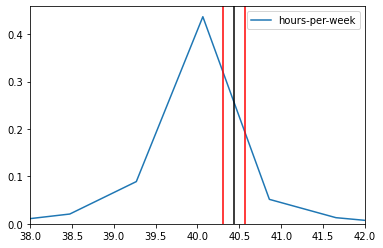

In [18]:
# visualize Frequentist approach with KDE plot
plt.xlim(38, 42)
sns.kdeplot(workers['hours-per-week'])
plt.axvline(x=conf_inter[0], color = 'red')
plt.axvline(x=conf_inter[1], color = 'red')
plt.axvline(x=workers['hours-per-week'].mean(), color = 'black');

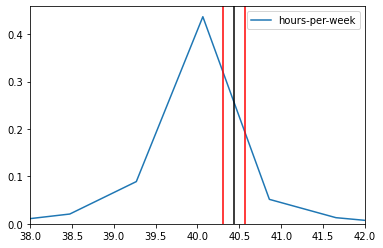

In [20]:
# visulaize Bayesian approach with KDE plot
plt.xlim(38, 42)
sns.kdeplot(workers['hours-per-week'])
plt.axvline(x=conf_bayes[0][1][0], color = 'red')
plt.axvline(x=conf_bayes[0][1][1], color = 'red')
plt.axvline(x=conf_bayes[0][0], color = 'black');

# 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

Frequentist statistics handles probability as the expected frequency of occurance over a set time, whereas Bayesian statistics instead views this through the lens of previously-held beliefs. 

Because of this, Bayesian statistics can be more subjective (due to the subjective nature of the "prior" variable), but at the same time it can construct a credible interval that allows it to say with certainty a percentage chance that Frequentist statistics cannot. 

A comical differentiation I saw (and therefore not my own words, but I wanted to share) was thus:
"A frequentist is a person whose long-run ambition is to be wrong 5% of the time. A Bayesian is one who, vaguely expecting a horse, and catching a glimpse of a donkey, strongly believes he has seen a mule."

In [26]:
# Stretch Goal: applying Bayesian technique to a previous assignment's problem
# read-in and import as needed

! wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data --no-check-certificate

--2020-04-15 02:11:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-04-15 02:11:58 (609 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [27]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

voters = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')
voters

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [28]:
voters.dropna(how='any', inplace=True)
print(voters.shape)
voters.isnull().sum().sum()

(232, 17)


0

In [29]:
# replace votes as numeric
voters = voters.replace({'y':1, 'n':0})
voters.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [30]:
# restrict to party lines
dem = voters[voters['party']=='democrat']
rep = voters[voters['party']=='republican']
print(rep.shape)
print(dem.shape)

print(rep['immigration'].mean())
voters.groupby('party')['immigration'].mean()

(108, 17)
(124, 17)
0.5740740740740741


party
democrat      0.532258
republican    0.574074
Name: immigration, dtype: float64

In [31]:
# Frequentist approach to rep voting y on immigration
conf_int_rep_imm = stats.t.interval(0.95, rep.shape[0], loc=rep['immigration'].mean(), scale=stats.sem(rep['immigration']))
conf_int_rep_imm

(0.4793193702923455, 0.6688287778558026)

In [39]:
# Bayesian approach
conf_bayes_rep_imm = stats.bayes_mvs(rep['immigration'],
                             alpha=0.95)
conf_bayes_rep_imm[0]

Mean(statistic=0.5740740740740741, minmax=(0.4793093369789436, 0.6688388111692045))

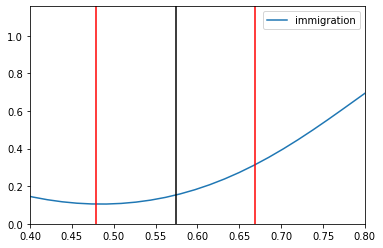

In [37]:
# visualize frequentist with KDE plot

plt.xlim(0.4,0.8)
sns.kdeplot(rep['immigration'])
plt.axvline(x=conf_int_rep_imm[0], color = 'red')
plt.axvline(x=conf_int_rep_imm[1], color = 'red')
plt.axvline(x=rep['immigration'].mean(), color = 'black');

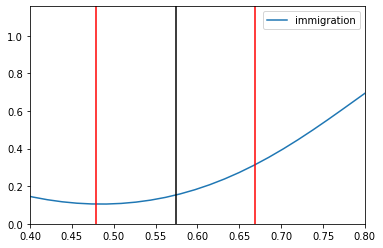

In [38]:
# visualize bayesian with KDE plot

plt.xlim(0.4,0.8)
sns.kdeplot(rep['immigration'])
plt.axvline(x=conf_bayes_rep_imm[0][1][0], color = 'red')
plt.axvline(x=conf_bayes_rep_imm[0][1][1], color = 'red')
plt.axvline(x=conf_bayes_rep_imm[0][0], color = 'black');

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!